## Lab 5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools


## Data Preprocessing ##

In [ ]:
# creating a copy of the data
data_copy = pd.read_csv('vehicle.csv')

#data_copy['class'].value_counts()

data_copy['class'] = data_copy['class'].replace("car", 0)
data_copy['class'] = data_copy['class'].replace("van", 1)
data_copy['class'] = data_copy['class'].replace("bus", 2)

In [ ]:
# scaling the data using min-max scaler, except the target variable
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = data_copy.drop('class', axis=1)
scaled_data = scaler.fit_transform(features)

# creating a dataframe of scaled features
scaled_data = pd.DataFrame(scaled_data, columns=features.columns)

# adding the target variable to the dataframe
scaled_data['class'] = data_copy['class']

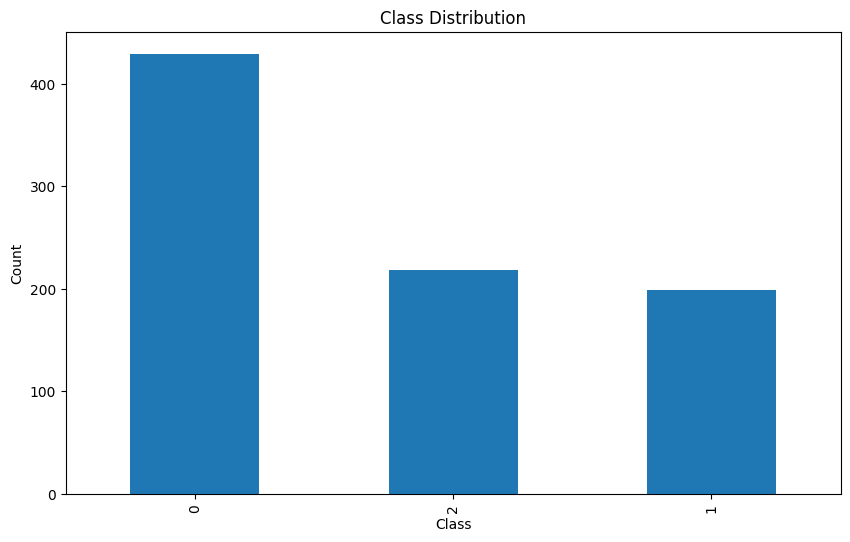

In [ ]:
# plotting the class distribution
plt.figure(figsize=(10, 6))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
scaled_data['class'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
# checking for missing columns
missing_columns = scaled_data.isnull().sum()
columns_with_missing = missing_columns[missing_columns > 0]
print(columns_with_missing)

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64


In [ ]:
missing_rows = scaled_data.isnull().any(axis=1)
rows_with_missing = scaled_data[missing_rows]

print("No of missing rows : ", scaled_data.isnull().any(axis=1).sum())
rows_with_missing

No of missing rows :  33


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
5,0.739130,NaN,0.916667,0.296943,0.032967,0.075472,0.934641,0.000000,0.916667,0.728571,0.789474,0.926859,0.974843,0.342105,0.227273,0.219512,0.166667,0.066667,2
9,0.434783,0.423077,0.805556,NaN,0.164835,0.169811,0.464052,0.285714,0.416667,0.400000,0.378947,0.384892,0.270440,0.065789,0.181818,0.341463,0.633333,0.766667,0
19,0.608696,0.884615,0.833333,0.484716,NaN,0.150943,0.627451,0.171429,0.583333,0.728571,0.510526,0.559952,0.716981,0.197368,0.272727,0.121951,0.333333,0.400000,0
35,0.586957,0.500000,NaN,0.296943,0.219780,0.132075,0.294118,0.485714,0.250000,0.457143,0.210526,0.214628,0.471698,0.105263,0.772727,0.170732,0.533333,0.633333,1
66,0.173913,0.384615,0.388889,0.091703,0.109890,0.113208,0.241830,0.571429,0.166667,0.400000,0.205263,0.166667,0.396226,NaN,NaN,0.439024,0.100000,0.100000,2
70,0.500000,0.846154,0.805556,0.248908,0.076923,0.150943,0.673203,0.142857,NaN,0.814286,0.505263,0.598321,0.704403,0.223684,0.136364,0.146341,0.300000,0.400000,0
77,0.282609,0.269231,0.305556,0.157205,0.164835,0.094340,0.248366,0.542857,0.166667,0.214286,0.184211,0.175060,0.402516,NaN,0.090909,0.073171,0.133333,0.133333,0
78,0.673913,0.730769,0.750000,NaN,0.208791,0.056604,0.627451,0.142857,0.583333,0.614286,0.510526,0.577938,0.685535,0.223684,0.500000,0.097561,0.566667,0.333333,2
105,0.760870,NaN,0.875000,0.427948,0.186813,0.150943,0.705882,0.114286,0.666667,0.714286,NaN,0.631894,0.660377,0.184211,0.500000,NaN,0.400000,0.600000,0
118,0.260870,NaN,NaN,0.104803,0.098901,0.113208,0.248366,0.571429,0.166667,0.371429,0.200000,0.167866,0.402516,0.302632,0.409091,0.341463,0.133333,0.100000,2


In [ ]:
# Define the threshold for the maximum number of allowed missing values per row
threshold = 1

# Calculate the number of missing values in each row
missing_values_per_row = scaled_data.isnull().sum(axis=1)

# Check if there are any rows with more than the threshold number of missing values
rows_with_more_than_threshold_missing_values = scaled_data[missing_values_per_row > threshold]

In [ ]:
rows_with_more_than_threshold_missing_values

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
66,0.173913,0.384615,0.388889,0.091703,0.109890,0.113208,0.241830,0.571429,0.166667,0.400000,0.205263,0.166667,0.396226,NaN,NaN,0.439024,0.100000,0.100000,2
105,0.760870,NaN,0.875000,0.427948,0.186813,0.150943,0.705882,0.114286,0.666667,0.714286,NaN,0.631894,0.660377,0.184211,0.500000,NaN,0.400000,0.600000,0
118,0.260870,NaN,NaN,0.104803,0.098901,0.113208,0.248366,0.571429,0.166667,0.371429,0.200000,0.167866,0.402516,0.302632,0.409091,0.341463,0.133333,0.100000,2
207,0.260870,0.346154,NaN,0.074236,0.087912,0.094340,0.241830,0.571429,0.166667,0.400000,0.194737,0.166667,NaN,0.342105,0.045455,0.146341,0.100000,0.033333,2
222,0.586957,0.653846,0.569444,0.406114,NaN,0.075472,0.483660,0.228571,0.416667,0.571429,0.400000,0.416067,0.559748,0.197368,NaN,0.024390,0.700000,0.566667,2
249,0.260870,0.038462,0.180556,0.100437,0.120879,0.075472,NaN,0.914286,0.000000,0.042857,0.036842,0.015588,0.113208,0.144737,NaN,0.487805,0.300000,0.266667,0
266,0.282609,NaN,0.347222,0.052402,0.065934,0.075472,0.261438,0.542857,0.166667,0.328571,0.236842,0.181055,NaN,0.342105,0.227273,0.097561,0.100000,0.066667,2


In [ ]:
to_be_dropped_rows = [66,105,118,207,222,249,266]
new_scaled_data = scaled_data.drop(to_be_dropped_rows)

In [ ]:
# filling the columns with the mean value
new_scaled_data.fillna(new_scaled_data.mean(),inplace=True)

In [ ]:
missing_columns = new_scaled_data.isnull().sum()
columns_with_missing = missing_columns[missing_columns > 0]
print(columns_with_missing)

Series([], dtype: int64)


In [ ]:
new_scaled_data

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.478261,0.576923,0.597222,0.323144,0.274725,0.150943,0.326797,0.457143,0.250000,0.585714,0.242105,0.233813,0.471698,0.144737,0.272727,0.390244,0.366667,0.533333,1
1,0.391304,0.307692,0.611111,0.161572,0.109890,0.132075,0.241830,0.542857,0.166667,0.357143,0.210526,0.175060,0.308176,0.171053,0.409091,0.341463,0.433333,0.600000,1
2,0.673913,0.653846,0.916667,0.458515,0.208791,0.150943,0.620915,0.171429,0.500000,0.571429,0.489474,0.540767,0.698113,0.184211,0.636364,0.219512,0.400000,0.500000,0
3,0.434783,0.307692,0.583333,0.240175,0.175824,0.132075,0.209150,0.571429,0.166667,0.357143,0.157895,0.149880,0.113208,0.052632,0.272727,0.243902,0.766667,0.866667,1
4,0.260870,0.423077,0.416667,0.441048,0.615385,0.943396,0.241830,0.542857,0.166667,0.371429,0.584211,0.169065,0.496855,0.894737,0.409091,0.268293,0.133333,0.066667,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0.434783,0.230769,0.652778,0.344978,0.186813,0.113208,0.372549,0.400000,0.250000,0.228571,0.368421,0.285372,0.251572,0.171053,0.318182,0.609756,0.400000,0.466667,0
842,0.347826,0.500000,0.611111,0.257642,0.208791,0.169811,0.307190,0.485714,0.250000,0.585714,0.226316,0.220624,0.421384,0.171053,0.045455,0.487805,0.333333,0.533333,1
843,0.717391,0.807692,0.847222,0.515284,0.219780,0.188679,0.718954,0.114286,0.666667,0.785714,0.515789,0.643885,0.572327,0.144737,0.136364,0.097561,0.366667,0.666667,0
844,0.282609,0.115385,0.527778,0.183406,0.120879,0.094340,0.150327,0.685714,0.083333,0.085714,0.131579,0.103118,0.245283,0.092105,0.000000,0.609756,0.466667,0.466667,0


### Classifiers

In [ ]:
# logistic regression on the original data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# will use cross validation to evaluate the model, along with confusion matrix and classification report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Split the data into training and testing data-sets

y = new_scaled_data['class']
X = new_scaled_data.drop('class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

Defining Functions for running the classifiers

In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_metrics(y_train, y_pred, y):

    conf_matrix = confusion_matrix(y_train, y_pred)

    # Initialize lists to store class-specific metrics
    class_metrics = []
    class_labels = y.unique()

    for i in range(len(class_labels)):
        TP = conf_matrix[i, i]
        FP = conf_matrix[:, i].sum() - TP
        FN = conf_matrix[i, :].sum() - TP
        TN = conf_matrix.sum() - TP - FP - FN

        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1_score = 2 * (precision * recall) / (precision + recall)
        TP_rate = recall
        FP_rate = FP / (FP + TN)
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)



        print(f'Class: {class_labels[i]}')
        print(f'TP rate/Recall: {TP_rate:.2f}')
        print(f'FP rate: {FP_rate:.2f}')
        print(f'Precision: {precision:.2f}')
        print(f'F1-Score: {f1_score:.2f}')
        print("Sensitivity:", sensitivity)
        print("Specificity:", specificity)
        print()



In [ ]:
def plot_confusion_matrix(y_train, predicted, y):

    classes = y.unique()
    conf_matrix = confusion_matrix(y_train, predicted)
    # Plot the confusion matrix
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, conf_matrix[i, j], horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

def calculate_roc_auc(classifier,y):
    # Assuming you have true labels (y_true) and predicted probabilities for each class (y_pred_probs)
    classifier.fit(X_train, y_train)
    y_pred_probs = classifier.predict_proba(X_test)
    classes = y.unique()
    for class_idx in range(len(classes)):
        # Create binary labels for the current class
        y_true_binary = (y_test == class_idx).astype(int)

        # Calculate AUC for the current class
        auc = roc_auc_score(y_true_binary, y_pred_probs[:, class_idx])
        print(f'AUC for Class {class_idx} :', auc)


In [ ]:
from sklearn.preprocessing import label_binarize
# Convert the labels to binary format for multi-class ROC calculation

def calculate_roc_curve(predictions,y) :
    classes = y.unique()
    num_classes = len(classes)
    y_bin = label_binarize(y, classes=classes)
    y_test_bin = label_binarize(y_test, classes=classes)
    y_pred_bin = label_binarize(predictions, classes=classes)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotting ROC for each class
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {classes[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

Random Forest Classifier

In [ ]:
# Choosing a classifier and running cross-validation
from sklearn.ensemble import RandomForestClassifier  # Replace with your chosen classifier

rf = RandomForestClassifier()  # Instantiate your classifier
rf.fit(X_train,y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("RandomForest Classifier Accuracy:", rf_accuracy)


# Perform cross-validation and get predicted labels for each fold
rf_pred = cross_val_predict(rf, X_train, y_train, cv=5)

# confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, rf_pred))

# classification report
print("Classification Report:")
print(classification_report(y_train, rf_pred))


RandomForest Classifier Accuracy: 0.9761904761904762
Confusion Matrix:
[[320  19   3]
 [  9 148   2]
 [  3   2 165]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       342
           1       0.88      0.93      0.90       159
           2       0.97      0.97      0.97       170

    accuracy                           0.94       671
   macro avg       0.94      0.95      0.94       671
weighted avg       0.94      0.94      0.94       671



In [ ]:
calculate_metrics(y_train,rf_pred,y)

Class: 1
TP rate/Recall: 0.94
FP rate: 0.03
Precision: 0.97
F1-Score: 0.96
Sensitivity: 0.9415204678362573
Specificity: 0.9696048632218845

Class: 0
TP rate/Recall: 0.94
FP rate: 0.04
Precision: 0.89
F1-Score: 0.91
Sensitivity: 0.9371069182389937
Specificity: 0.96484375

Class: 2
TP rate/Recall: 0.98
FP rate: 0.01
Precision: 0.97
F1-Score: 0.98
Sensitivity: 0.9823529411764705
Specificity: 0.9900199600798403



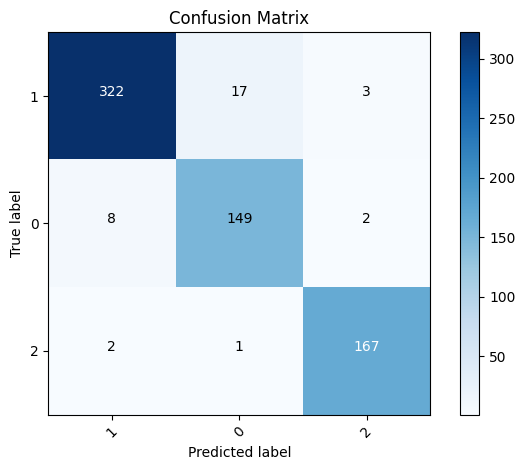

In [ ]:
plot_confusion_matrix(y_train,rf_pred,y)

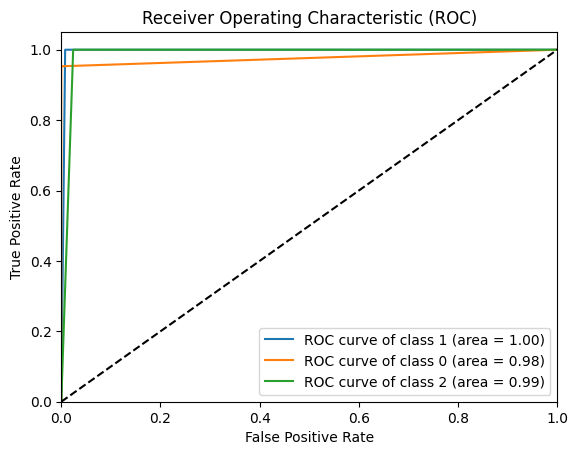

In [ ]:
calculate_roc_curve(rf_predictions,y)

In [ ]:
calculate_roc_auc(rf,y)

AUC for Class 0 : 0.9965272856130404
AUC for Class 1 : 0.998046875
AUC for Class 2 : 0.9993488372093023


Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB, ComplementNB, BernoulliNB, CategoricalNB, MultinomialNB
#from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [ ]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)

gnb_pred = cross_val_predict(gnb, X_train, y_train, cv=5)

# confusion matrix
print("Confusion Matrix For Gaussian NB:")
print(confusion_matrix(y_train, gnb_pred))

# classification report
print("Classification Report For Gaussian NB:")
print(classification_report(y_train, gnb_pred))


Gaussian Naive Bayes Accuracy: 0.6130952380952381
Confusion Matrix For Gaussian NB:
[[241  99   2]
 [ 17 135   7]
 [ 37  98  35]]
Classification Report For Gaussian NB:
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       342
           1       0.41      0.85      0.55       159
           2       0.80      0.21      0.33       170

    accuracy                           0.61       671
   macro avg       0.67      0.59      0.54       671
weighted avg       0.71      0.61      0.60       671



In [ ]:
calculate_metrics(y_train,gnb_pred,y)

Class: 1
TP rate/Recall: 0.70
FP rate: 0.16
Precision: 0.82
F1-Score: 0.76
Sensitivity: 0.7046783625730995
Specificity: 0.8358662613981763

Class: 0
TP rate/Recall: 0.85
FP rate: 0.38
Precision: 0.41
F1-Score: 0.55
Sensitivity: 0.8490566037735849
Specificity: 0.615234375

Class: 2
TP rate/Recall: 0.21
FP rate: 0.02
Precision: 0.80
F1-Score: 0.33
Sensitivity: 0.20588235294117646
Specificity: 0.9820359281437125



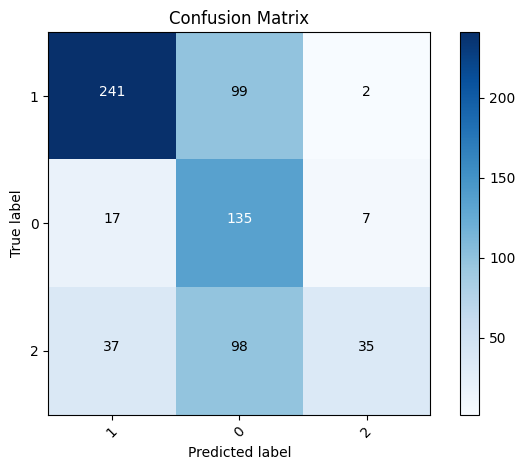

In [ ]:
plot_confusion_matrix(y_train,gnb_pred,y)

In [ ]:
calculate_roc_auc(gnb,y)

AUC for Class 0 : 0.8104890148830617
AUC for Class 1 : 0.817578125
AUC for Class 2 : 0.8344186046511628


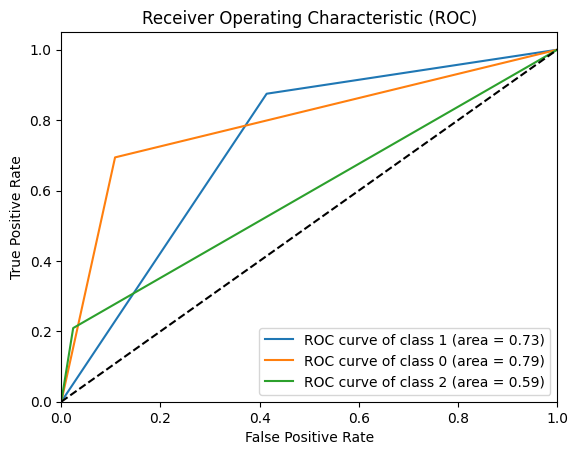

In [62]:
calculate_roc_curve(gnb_predictions,y)

Complement Naive Bayes

In [36]:
# Complement Naive Bayes
cnb = ComplementNB()
cnb.fit(X_train, y_train)
cnb_predictions = cnb.predict(X_test)
cnb_accuracy = accuracy_score(y_test, cnb_predictions)
print("Complement Naive Bayes Accuracy:", cnb_accuracy)

cnb_pred = cross_val_predict(cnb, X_train, y_train, cv=5)

# confusion matrix
print("Confusion Matrix For Complement NB:")
print(confusion_matrix(y_train, cnb_pred))

# classification report
print("Classification Report For Complement NB:")
print(classification_report(y_train, cnb_pred))


Complement Naive Bayes Accuracy: 0.6071428571428571
Confusion Matrix For Complement NB:
[[225 117   0]
 [  0 154   5]
 [ 57  97  16]]
Classification Report For Complement NB:
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       342
           1       0.42      0.97      0.58       159
           2       0.76      0.09      0.17       170

    accuracy                           0.59       671
   macro avg       0.66      0.57      0.49       671
weighted avg       0.70      0.59      0.55       671



In [55]:
calculate_metrics(y_train,cnb_pred,y)

Class: 1
TP rate/Recall: 0.66
FP rate: 0.17
Precision: 0.80
F1-Score: 0.72
Sensitivity: 0.6578947368421053
Specificity: 0.8267477203647416

Class: 0
TP rate/Recall: 0.97
FP rate: 0.42
Precision: 0.42
F1-Score: 0.58
Sensitivity: 0.9685534591194969
Specificity: 0.58203125

Class: 2
TP rate/Recall: 0.09
FP rate: 0.01
Precision: 0.76
F1-Score: 0.17
Sensitivity: 0.09411764705882353
Specificity: 0.9900199600798403



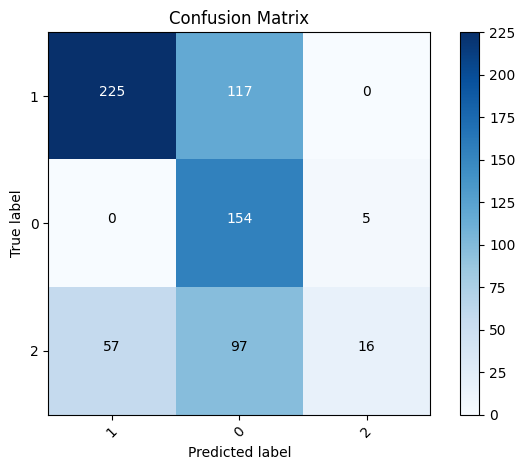

In [59]:
plot_confusion_matrix(y_train,cnb_pred,y)

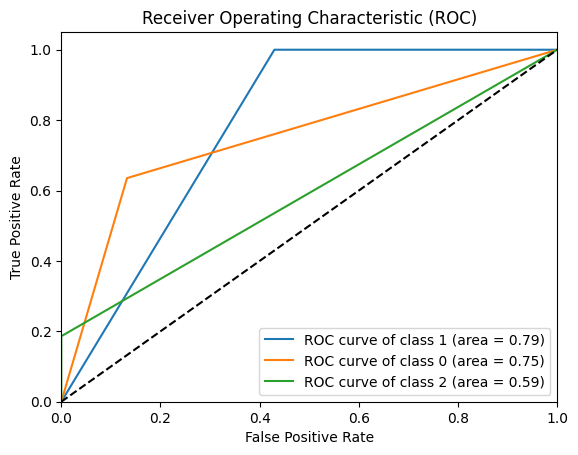

In [63]:
calculate_roc_curve(cnb_predictions,y)

In [37]:
calculate_roc_auc(cnb,y)

AUC for Class 0 : 0.7838412473423103
AUC for Class 1 : 0.8310546875
AUC for Class 2 : 0.7802790697674419


Bernoulli Naive Bayes

In [38]:
# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_predictions = bnb.predict(X_test)
bnb_accuracy = accuracy_score(y_test, bnb_predictions)
print("Bernoulli Naive Bayes Accuracy:", bnb_accuracy)

bnb_pred = cross_val_predict(bnb, X_train, y_train, cv=5)

# confusion matrix
print("Confusion Matrix For Bernoulli NB:")
print(confusion_matrix(y_train, bnb_pred))

# classification report
print("Classification Report For Bernoulli NB:")
print(classification_report(y_train, bnb_pred))



Bernoulli Naive Bayes Accuracy: 0.5238095238095238
Confusion Matrix For Bernoulli NB:
[[329   9   4]
 [132  25   2]
 [157   0  13]]
Classification Report For Bernoulli NB:
              precision    recall  f1-score   support

           0       0.53      0.96      0.69       342
           1       0.74      0.16      0.26       159
           2       0.68      0.08      0.14       170

    accuracy                           0.55       671
   macro avg       0.65      0.40      0.36       671
weighted avg       0.62      0.55      0.45       671



In [56]:
calculate_metrics(y_train,bnb_pred,y)

Class: 1
TP rate/Recall: 0.96
FP rate: 0.88
Precision: 0.53
F1-Score: 0.69
Sensitivity: 0.9619883040935673
Specificity: 0.12158054711246201

Class: 0
TP rate/Recall: 0.16
FP rate: 0.02
Precision: 0.74
F1-Score: 0.26
Sensitivity: 0.15723270440251572
Specificity: 0.982421875

Class: 2
TP rate/Recall: 0.08
FP rate: 0.01
Precision: 0.68
F1-Score: 0.14
Sensitivity: 0.07647058823529412
Specificity: 0.9880239520958084



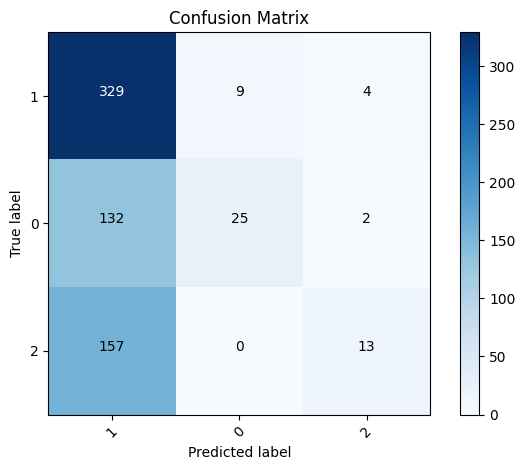

In [40]:
plot_confusion_matrix(y_train,bnb_pred,y)

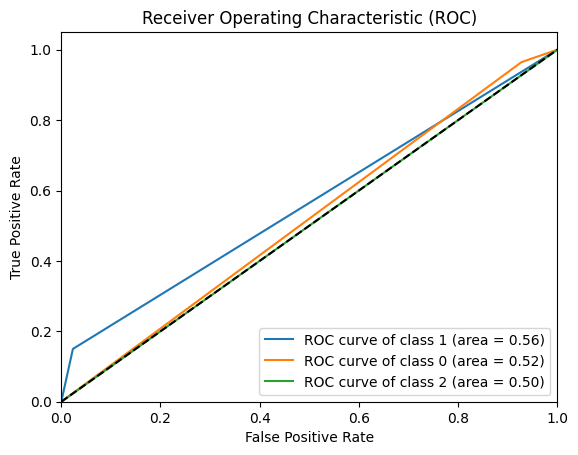

In [64]:
calculate_roc_curve(bnb_predictions,y)

In [41]:
calculate_roc_auc(bnb,y)

AUC for Class 0 : 0.5377746279234585
AUC for Class 1 : 0.5931640625
AUC for Class 2 : 0.5408372093023256


Categorical Naive Bayes

Since our categorical data is one-hot encoded, we cannot use one-hot encoded features with categorical Naive Bayes. The algorithm expects raw categorical values, not one-hot encoded vectors.

Multinomial Naive Bayes

In [47]:
# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_predictions = mnb.predict(X_test)
mnb_accuracy = accuracy_score(y_test, mnb_predictions)
print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)

mnb_pred = cross_val_predict(mnb, X_train, y_train, cv=5)

# confusion matrix
print("Confusion Matrix For Multinomial NB:")
print(confusion_matrix(y_train, mnb_pred))

# classification report
print("Classification Report For Multinomial NB:")
print(classification_report(y_train, mnb_pred))



Multinomial Naive Bayes Accuracy: 0.5297619047619048
Confusion Matrix For Multinomial NB:
[[333   9   0]
 [129  30   0]
 [169   0   1]]
Classification Report For Multinomial NB:
              precision    recall  f1-score   support

           0       0.53      0.97      0.68       342
           1       0.77      0.19      0.30       159
           2       1.00      0.01      0.01       170

    accuracy                           0.54       671
   macro avg       0.77      0.39      0.33       671
weighted avg       0.70      0.54      0.42       671



In [57]:
calculate_metrics(y_train,mnb_pred,y)

Class: 1
TP rate/Recall: 0.97
FP rate: 0.91
Precision: 0.53
F1-Score: 0.68
Sensitivity: 0.9736842105263158
Specificity: 0.09422492401215805

Class: 0
TP rate/Recall: 0.19
FP rate: 0.02
Precision: 0.77
F1-Score: 0.30
Sensitivity: 0.18867924528301888
Specificity: 0.982421875

Class: 2
TP rate/Recall: 0.01
FP rate: 0.00
Precision: 1.00
F1-Score: 0.01
Sensitivity: 0.0058823529411764705
Specificity: 1.0



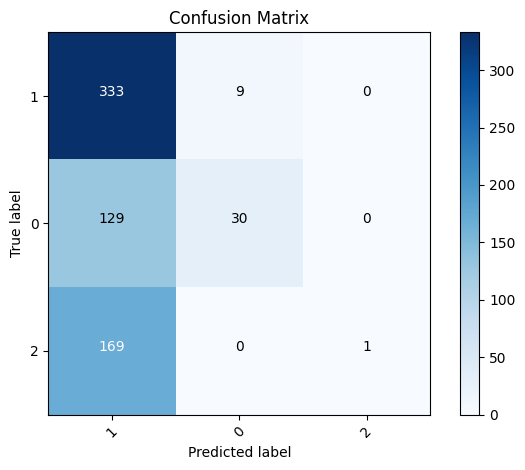

In [58]:
plot_confusion_matrix(y_train,mnb_pred,y)

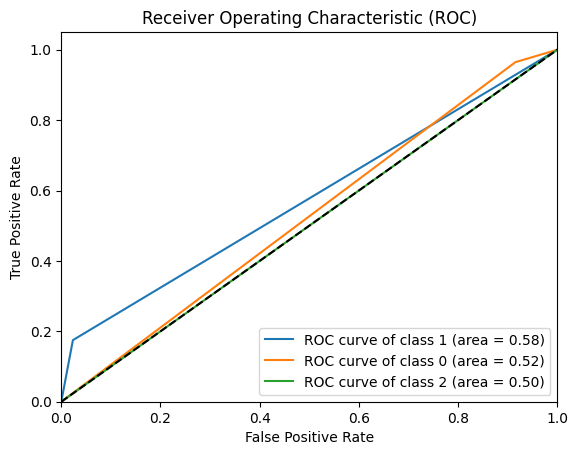

In [65]:
calculate_roc_curve(mnb_predictions,y)

In [59]:
calculate_roc_auc(mnb,y)

AUC for Class 0 : 0.7859673990077959
AUC for Class 1 : 0.8271484375
AUC for Class 2 : 0.7648372093023256
